# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 1, 2017

## Logistic Regression 

### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $p_{+} = p(y = 1|x) = \frac{1}{1 + e^{-w.x + b}}$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y * log(p_{+}) + (1 - y) * log(1 - p_{+}))$

LEARNING RULE: $w \leftarrow w - \eta * (\hat{y} - y) * x$

In [1]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plot

import matplotlib
matplotlib.rc('text', usetex=True)

In [2]:
numpy.random.seed(1234)

## 1. Data Preparation

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Sample dataset preparation

n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

## 2. Model Definition

In [5]:
'''
Sigmoid function.

INPUT: A scalar/vector
OUTPUT: A value between (0, 1) for each input component
'''

def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [6]:
'''
Definition of the logistic regression model.

INPUT: Feature vector (x) and weight vector (w)
OUTPUT: The probability of each data point belonging to the positive class.
'''

def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [7]:
'''
Distance function of the logistic regression model (popularly called likelihood). 

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: Log of the likelihood for the given 'w'
'''

def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [8]:
'''
Learning rule for the logistic regression model.

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: The direction of update for the weight vector
'''

def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y)
    return dw

## 3. Learning Process

In [9]:
# Initializing the weight vector randomly
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = 10   # Learning rate
old_cost = numpy.Inf

for ni in range(n_iter):
    pred_y = logreg(x_train, w)
    
    w -= eta * logreg_rule(y_train, x_train, w)    # Updating the weight vector
    
    cost = logreg_dist(y_train, x_train, w, avg=True)
    
    if numpy.mod(ni, 50) == 0:
        print('Logistic regression cost {} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Logistic regression cost nan after iteration 0
Logistic regression cost nan after iteration 50
Logistic regression cost 0.0834052960702 after iteration 100
Logistic regression cost 0.0805253683479 after iteration 150
Logistic regression cost 0.0800316585646 after iteration 200
Logistic regression cost 0.079989150833 after iteration 250
Logistic regression cost 0.0799864936563 after iteration 300
Logistic regression cost 0.0799863428169 after iteration 350
Logistic regression cost 0.0799863344592 after iteration 400
Logistic regression cost 0.0799863339988 after iteration 450
Logistic regression cost 0.0799863339734 after iteration 500
Logistic regression cost 0.079986333972 after iteration 550
Logistic regression cost 0.079986333972 after iteration 600
Converged


/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


In [10]:
print('Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)))
print('Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))

Initial: 0.9 x_1 + 0.75 x_2 + 0.0 = 0
Final: -5.0 x_1 + -2.5 x_2 + 0.58 = 0


## 4. Visualize Final Model

In [11]:
# visualize data 
def vis_data(x, y = None, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [12]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

In [13]:
def vis_decision_boundary_contour(w, typ='k--'):
    plot.hold('on')
    
    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)
    
    plot.colorbar(plt1)
    
    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


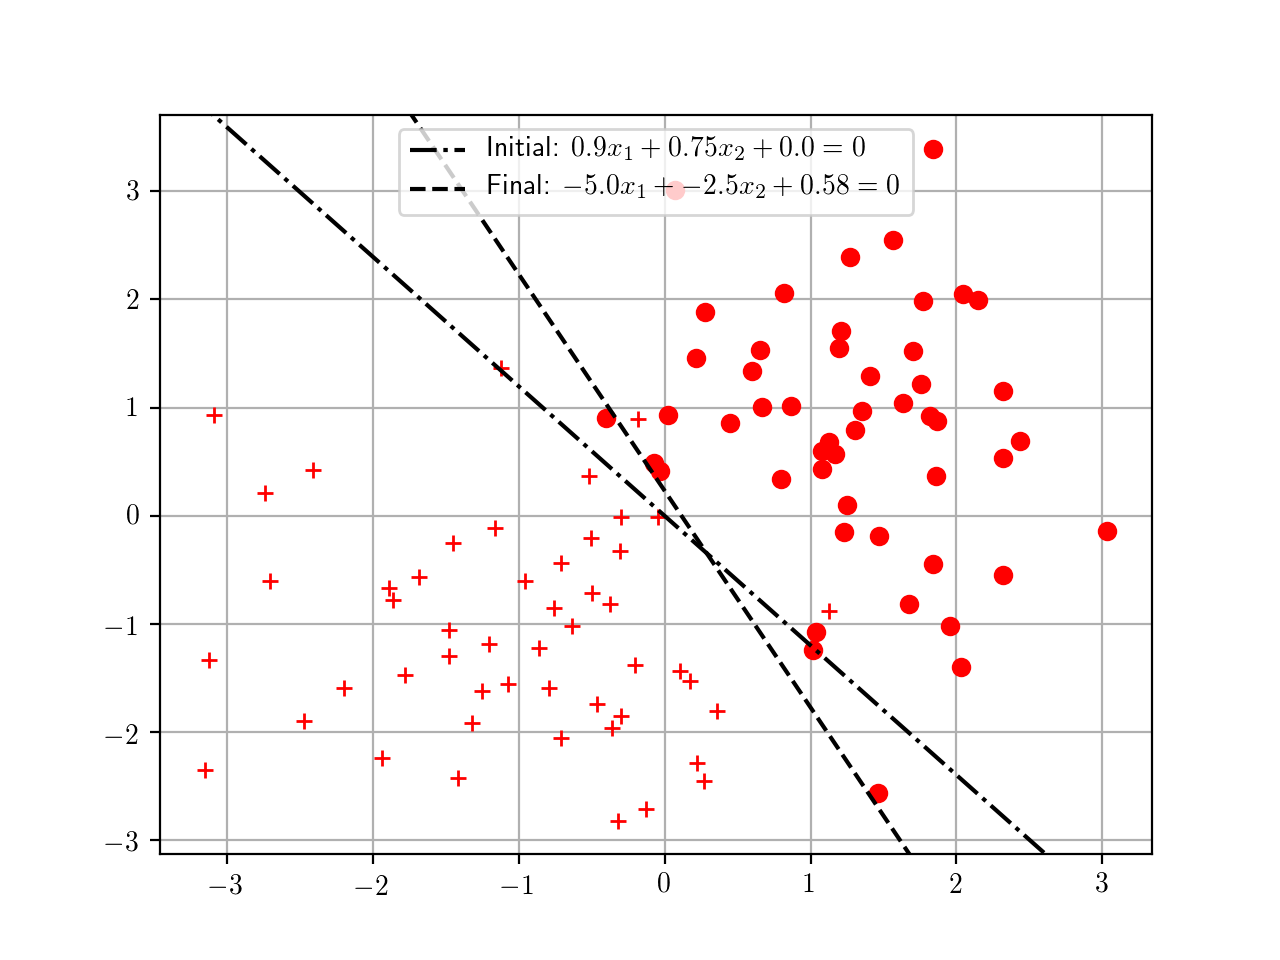

/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes an

In [14]:
plot.figure()

vis_data(x_train, y_train, c='r')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

<IPython.core.display.Javascript object>


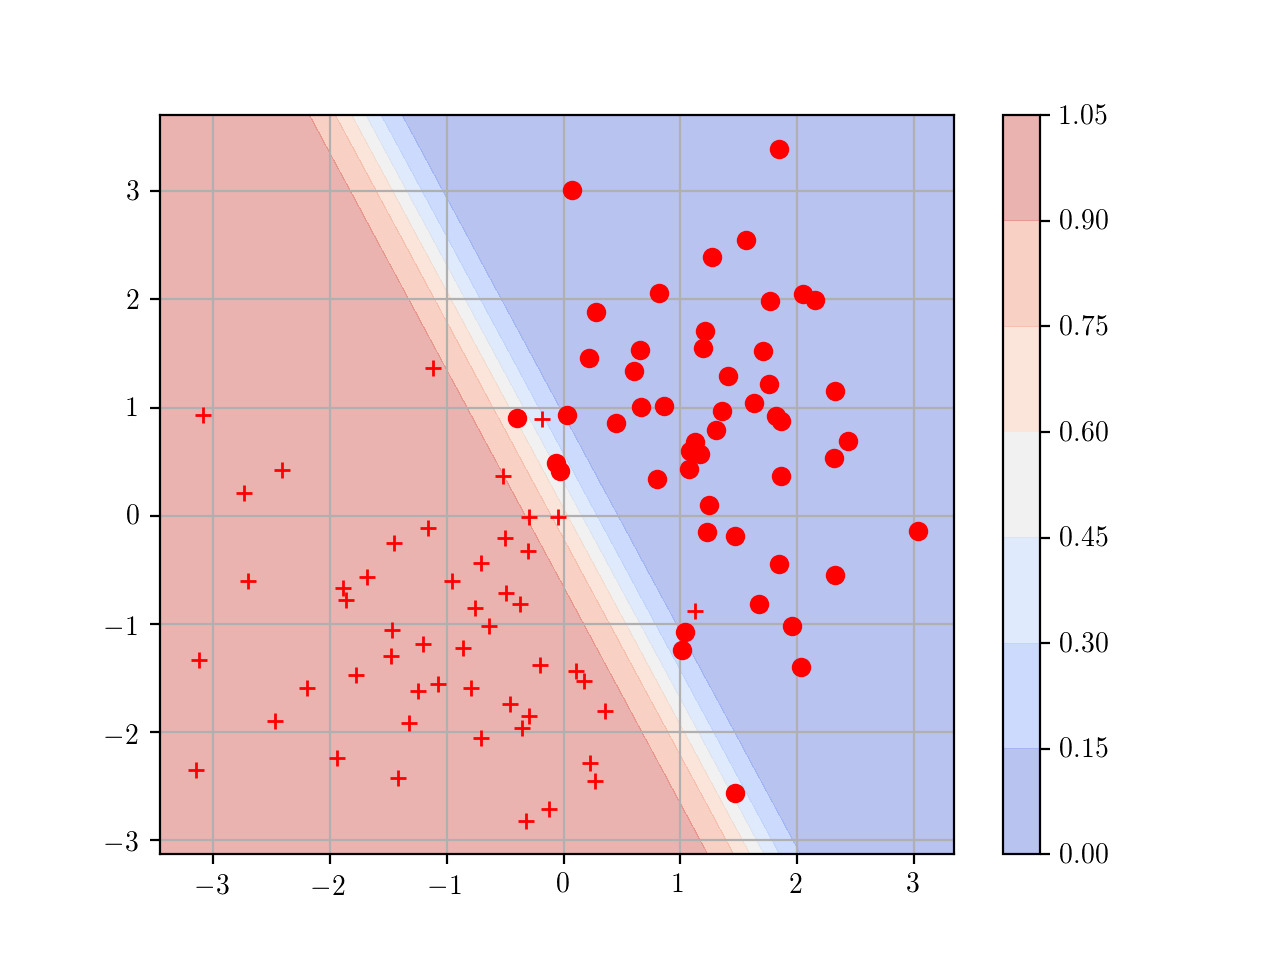

/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: MatplotlibD

In [15]:
vis_data(x_train, y_train, c= 'r', open_figure=True)
vis_decision_boundary_contour(w)

## 5. Testing

<IPython.core.display.Javascript object>


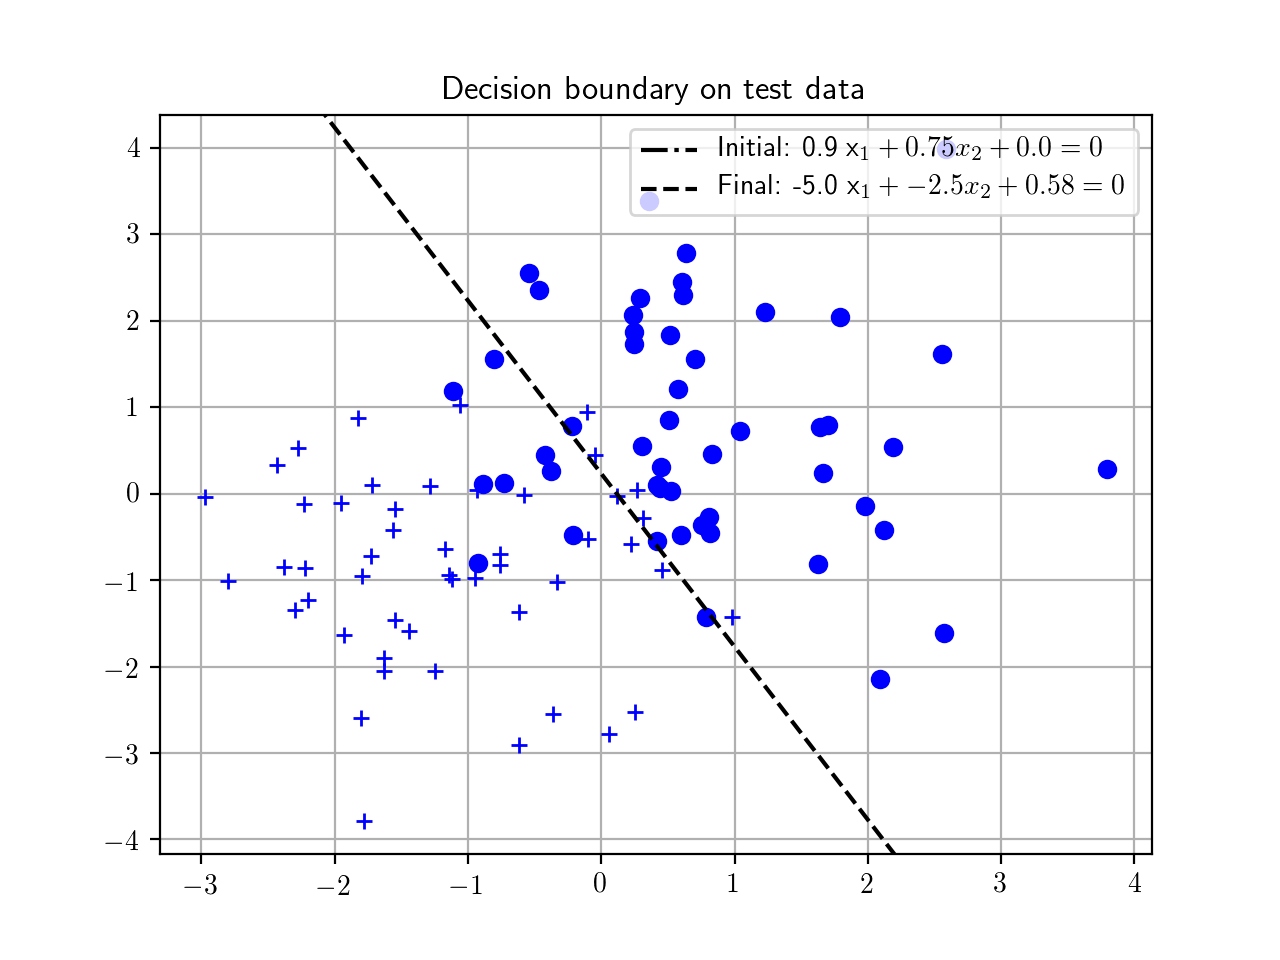

/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/Users/rossfreeman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: MatplotlibD

In [16]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')

plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [17]:
train_error = numpy.sum(numpy.abs(numpy.round(logreg(x_train, w)) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(numpy.round(logreg(x_test, w)) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.14


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [18]:
# Use this cell to import required packages of sklearn
from sklearn.linear_model import LogisticRegression

In [19]:
# STEP 1: Create a Logistic Regression class instance

regression = LogisticRegression(penalty='l2', dual=False, tol=1e-16, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [20]:
# STEP 2: Fit the logistic regression model to the training data

regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-16,
          verbose=0, warm_start=False)

In [21]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)

coef = regression.coef_[0]
bias = regression.intercept_[0]

In [22]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.

print('Original: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))
print('scikit-learn: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(coef[0], coef[1], bias))
# Both equations are drastically different. sklearn resulted in coefficients being half of the original
# (i.e. less negative) and a bias that is less than half of the original.

Original: -5.0 x_1 + -2.5 x_2 + 0.58 = 0
scikit-learn: -2.5 x_1 + -1.3 x_2 + 0.24 = 0


In [23]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.

train_error = 1 - regression.score(x_train, y_train)
test_error = 1 - regression.score(x_test, y_test)
print ('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.15
